In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('computer_prices_all.csv')
df.head()

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


In [3]:
df.columns

Index(['device_type', 'brand', 'model', 'release_year', 'os', 'form_factor',
       'cpu_brand', 'cpu_model', 'cpu_tier', 'cpu_cores', 'cpu_threads',
       'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_brand', 'gpu_model', 'gpu_tier',
       'vram_gb', 'ram_gb', 'storage_type', 'storage_gb',
       'storage_drive_count', 'display_type', 'display_size_in', 'resolution',
       'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'wifi',
       'bluetooth', 'weight_kg', 'warranty_months', 'price'],
      dtype='object')

In [4]:
df.shape

(100000, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_tier          

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
device_type,100000,2,Laptop,59844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,100000,10,Lenovo,15992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,100000,99036,Lenovo Think 0V5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,100000.0,NaN,NaN,NaN,2022.32085,2.025761,2018.0,2021.0,2023.0,2024.0,2025.0
os,100000,4,Windows,71817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
form_factor,100000,10,Mainstream,17819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_brand,100000,3,Intel,52774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_model,100000,26971,Apple M2 Pro,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_tier,100000.0,NaN,NaN,NaN,3.15349,1.373175,1.0,2.0,3.0,4.0,6.0
cpu_cores,100000.0,NaN,NaN,NaN,10.51574,5.044092,4.0,6.0,8.0,14.0,28.0


In [26]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [9]:
df['price_rank']=df['price'].rank(method='min', ascending=False).astype(int)
df[df['price_rank']<10]

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price,price_rank
28820,Laptop,Apple,Apple Creator ZMH,2024,Windows,Gaming,Apple,Apple M1 Max,3,8,...,144,60,65,0,Wi-Fi 6,5.2,1.87,12,8794.99,7
36091,Laptop,Apple,Apple Blade NW3,2021,Windows,Ultrabook,Apple,Apple M2 Pro,5,16,...,120,90,90,0,Wi-Fi 6,5.2,1.10,36,9529.99,6
40823,Laptop,Lenovo,Lenovo Pro KMZ,2025,ChromeOS,Gaming,Intel,Intel i7-10176,5,16,...,120,60,65,0,Wi-Fi 7,5.3,1.70,36,10984.99,1
54591,Desktop,Apple,Apple Pro XVG,2025,macOS,ATX,Apple,Apple M1 Pro,4,14,...,165,0,0,550,Wi-Fi 6,5.2,6.00,12,9772.99,2
64831,Desktop,HP,HP Think 1FC,2022,Windows,Micro-ATX,AMD,AMD Ryzen 7 7131,5,16,...,60,0,0,450,Wi-Fi 5,5.3,8.00,12,9633.99,3
69792,Desktop,Apple,Apple Station N4Y,2024,macOS,SFF,Apple,Apple M2 Max,5,20,...,120,0,0,550,Wi-Fi 6,5.0,6.00,12,9544.99,5
75607,Desktop,MSI,MSI Pro 8M3,2025,macOS,ATX,Intel,Intel i7-14439,4,14,...,60,0,0,650,Wi-Fi 6,5.0,8.00,12,9621.99,4
95472,Laptop,Apple,Apple Stealth 8EE,2023,Windows,2-in-1,Apple,Apple M3,5,18,...,60,56,65,0,Wi-Fi 6,5.2,3.00,12,8701.99,8
97808,Laptop,Gigabyte,Gigabyte Pro XC2,2025,Windows,Ultrabook,AMD,AMD Ryzen 7 5252,5,16,...,60,56,45,0,Wi-Fi 6E,5.1,1.50,12,8579.99,9


In [10]:
data_hp=df[df['brand']=='HP']
data_hp.sort_values('price', ascending=False).head(5)

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price,price_rank
64831,Desktop,HP,HP Think 1FC,2022,Windows,Micro-ATX,AMD,AMD Ryzen 7 7131,5,16,...,60,0,0,450,Wi-Fi 5,5.3,8.00,12,9633.99,3
87726,Laptop,HP,HP Creator 67V,2020,Windows,Workstation,Intel,Intel i7-13732,4,12,...,120,80,90,0,Wi-Fi 6,5.2,1.17,24,8283.99,11
73369,Laptop,HP,HP Stealth H56,2023,macOS,Mainstream,AMD,AMD Ryzen 7 5383,4,14,...,120,80,45,0,Wi-Fi 5,5.3,1.50,12,6590.99,29
93859,Laptop,HP,HP Slim P3B,2018,Linux,Ultrabook,AMD,AMD Ryzen 7 7116,5,16,...,60,50,180,0,Wi-Fi 5,5.3,1.57,12,6248.99,32
53210,Laptop,HP,HP Legion YBQ,2022,macOS,Ultrabook,Intel,Intel i5-10426,2,6,...,120,60,180,0,Wi-Fi 5,5.2,1.53,24,5727.99,41


In [11]:
data_hp.groupby('release_year')['brand'].value_counts()

release_year  brand
2018          HP        734
2019          HP        978
2020          HP       1140
2021          HP       1657
2022          HP       2301
2023          HP       2546
2024          HP       2576
2025          HP       2182
Name: count, dtype: int64

In [12]:
df.groupby('release_year')['brand'].value_counts()

release_year  brand   
2018          Lenovo       793
              HP           734
              Dell         703
              Apple        578
              ASUS         507
                          ... 
2025          Acer        1585
              Samsung     1328
              MSI         1263
              Gigabyte     784
              Razer        498
Name: count, Length: 80, dtype: int64

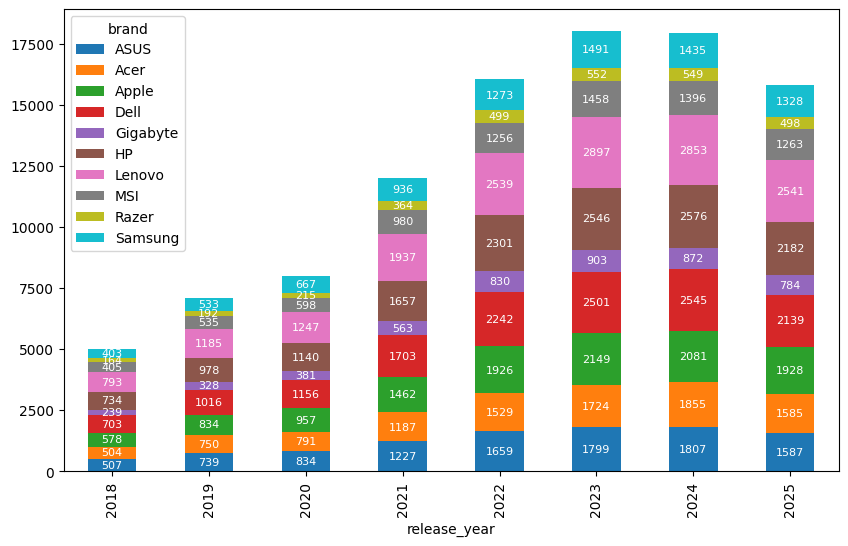

In [13]:
grouped=df.groupby(['release_year', 'brand']).size().unstack(fill_value=0)
ax=grouped.plot(kind='bar', stacked=True, figsize=(10,6))
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='white')
plt.show()

In [14]:
df['device_type'].value_counts()

device_type
Laptop     59844
Desktop    40156
Name: count, dtype: int64

In [15]:
df['brand'].value_counts()

brand
Lenovo      15992
HP          14114
Dell        14005
Apple       11915
ASUS        10159
Acer         9925
Samsung      8066
MSI          7891
Gigabyte     4900
Razer        3033
Name: count, dtype: int64

In [16]:
df['model'].value_counts()

model
Lenovo Think 0V5    3
HP Creator R41      3
ASUS Slim R6S       3
Acer Creator 3U0    3
Dell Think QJA      3
                   ..
Apple Slim FHF      1
Acer Legion HB4     1
Lenovo Forge AJR    1
HP Station V1X      1
Acer Think L7R      1
Name: count, Length: 99036, dtype: int64

In [17]:
df['model'].nunique()

99036

In [18]:
df['release_year'].value_counts()

release_year
2023    18020
2024    17969
2022    16054
2025    15835
2021    12016
2020     7986
2019     7090
2018     5030
Name: count, dtype: int64

In [19]:
df['os'].value_counts()

os
Windows     71817
macOS       18207
Linux        6109
ChromeOS     3867
Name: count, dtype: int64

In [20]:
df['form_factor'].value_counts()

form_factor
Mainstream     17819
Gaming         16876
ATX            15597
Ultrabook      13236
Micro-ATX       8672
Full-Tower      7110
2-in-1          7049
SFF             5585
Workstation     4864
Mini-ITX        3192
Name: count, dtype: int64

In [21]:
df['cpu_brand'].value_counts()

cpu_brand
Intel    52774
AMD      35311
Apple    11915
Name: count, dtype: int64

In [22]:
df['cpu_model'].nunique()

26971

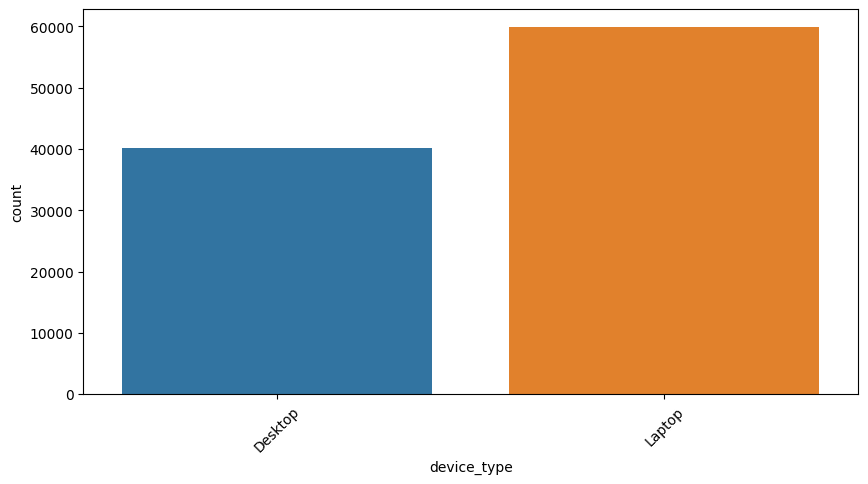

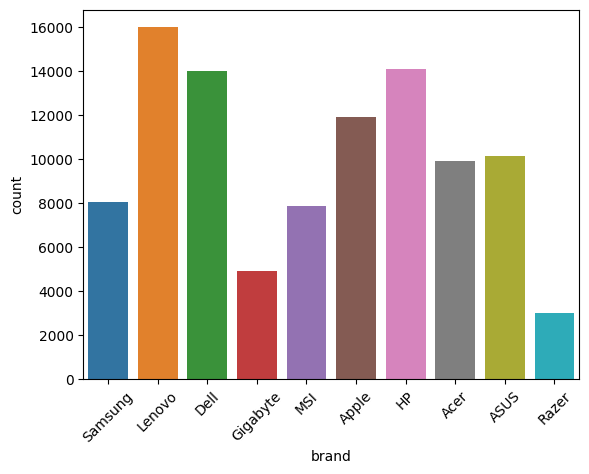

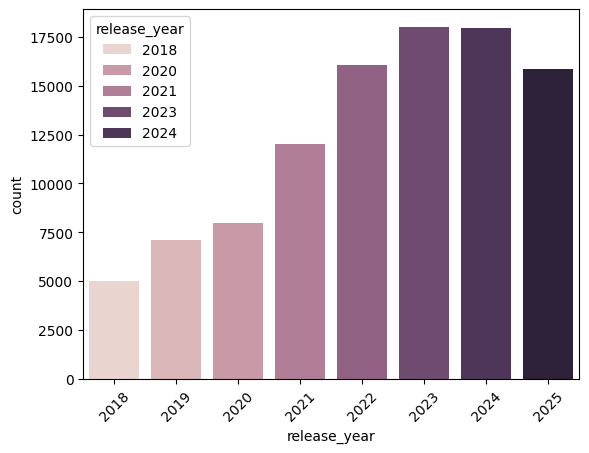

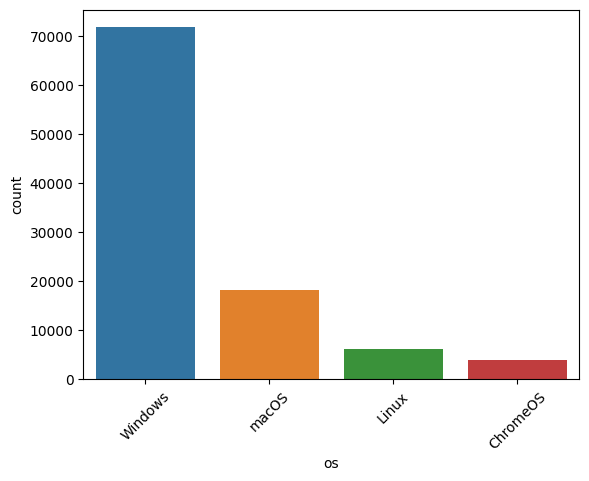

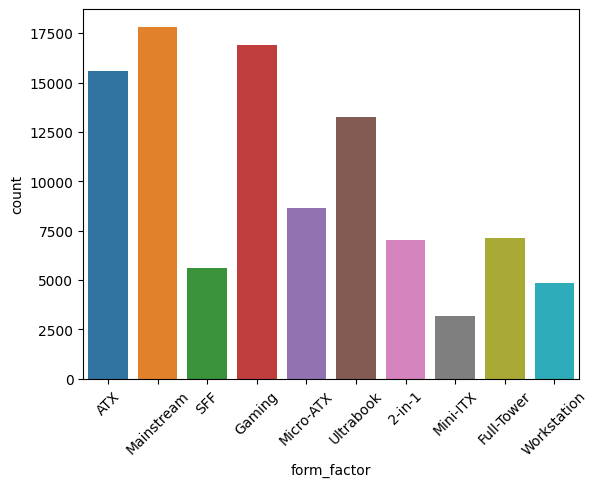

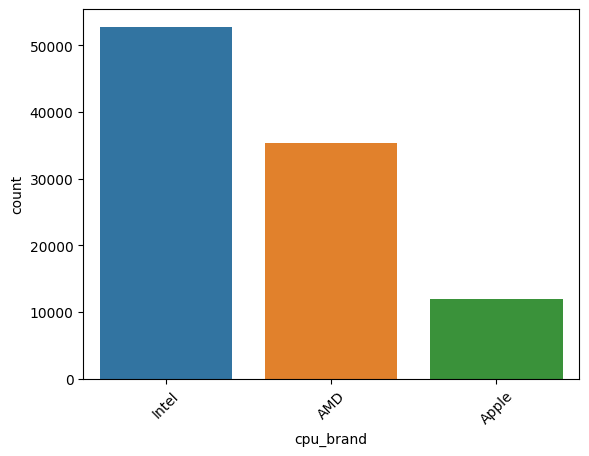

In [23]:
plt.figure(figsize=(10, 5))
for col in ['device_type', 'brand', 'release_year', 'os', 'form_factor', 'cpu_brand']:
    sns.countplot(df, x=col, hue=col)
    plt.xticks(rotation=45)
    plt.show()    

In [24]:
def displots(col):
    sns.distplot(df[col])
    plt.show()

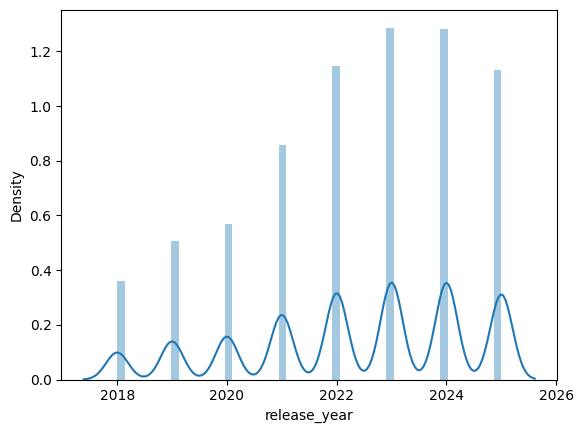

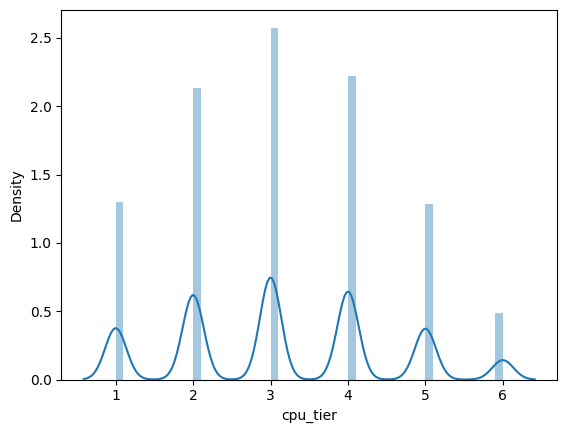

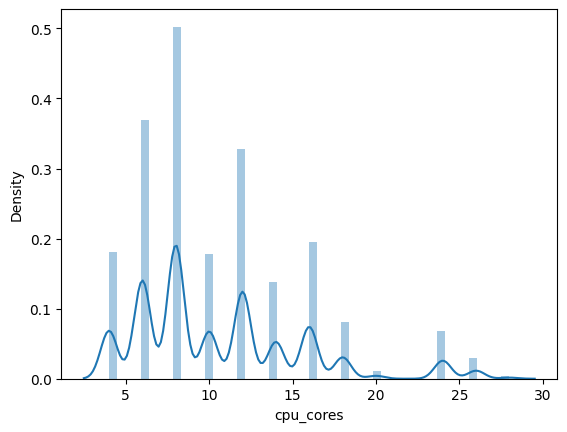

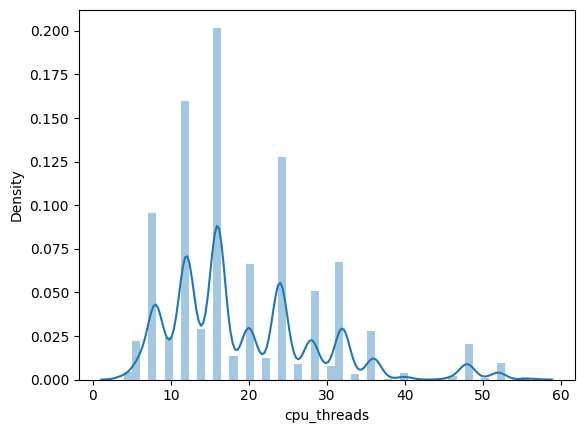

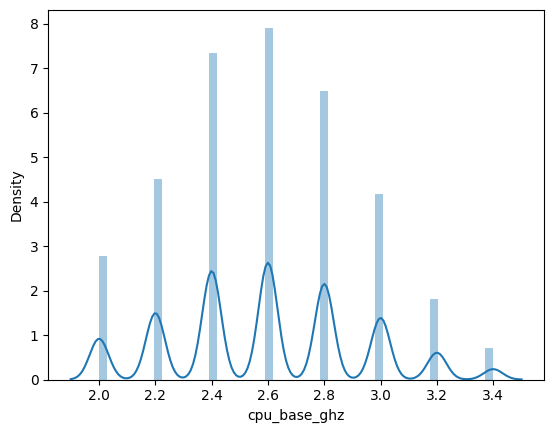

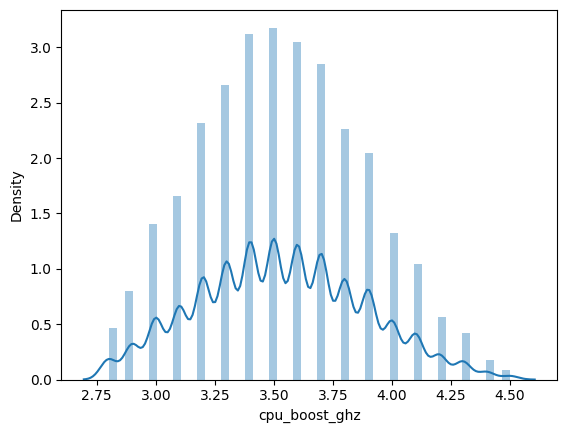

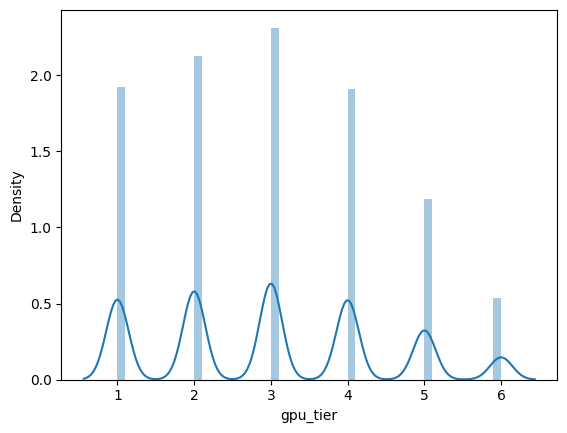

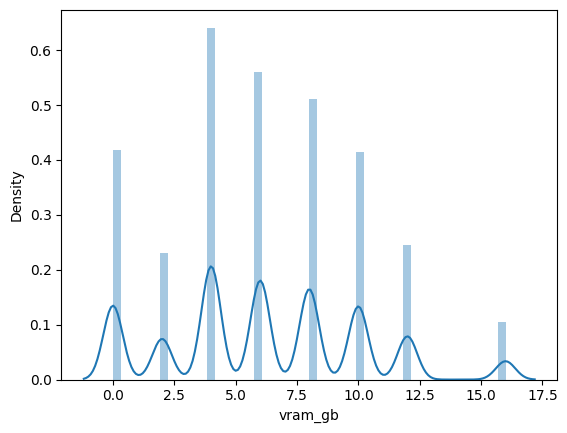

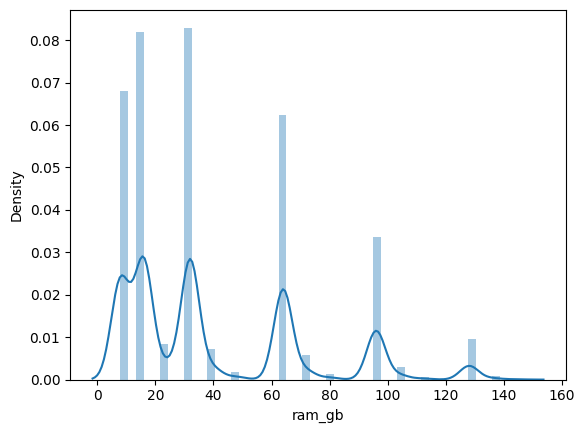

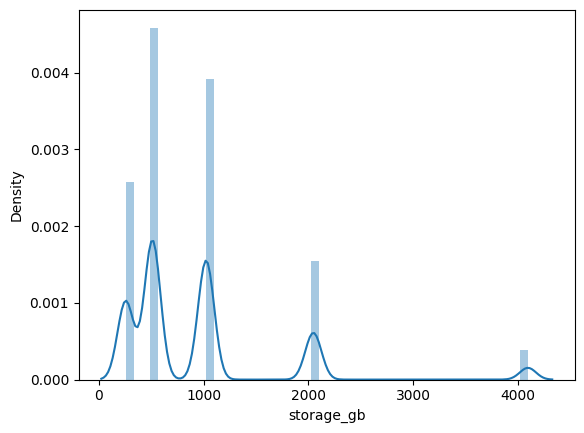

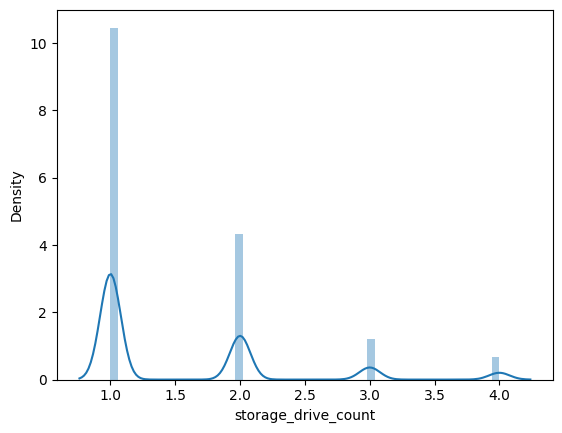

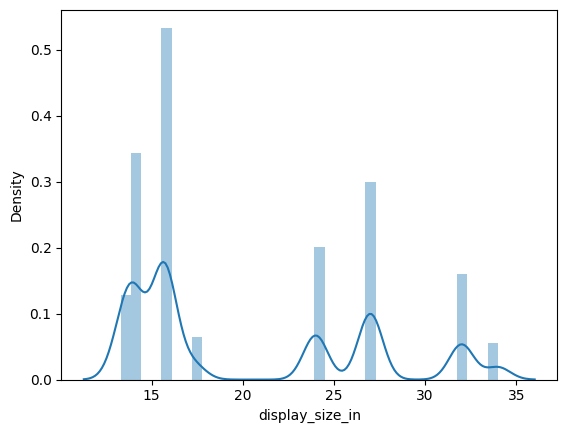

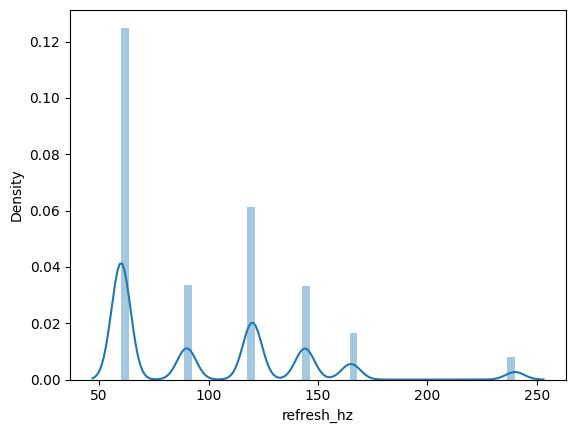

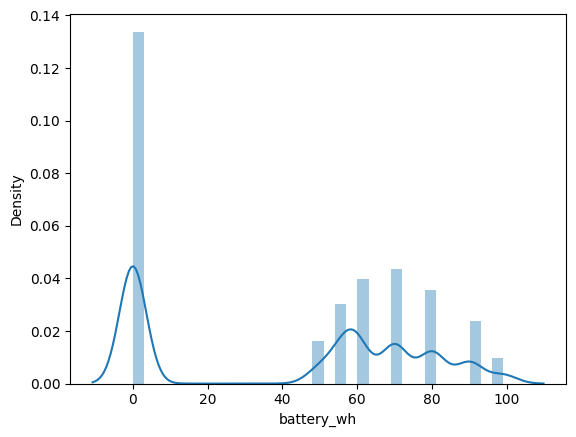

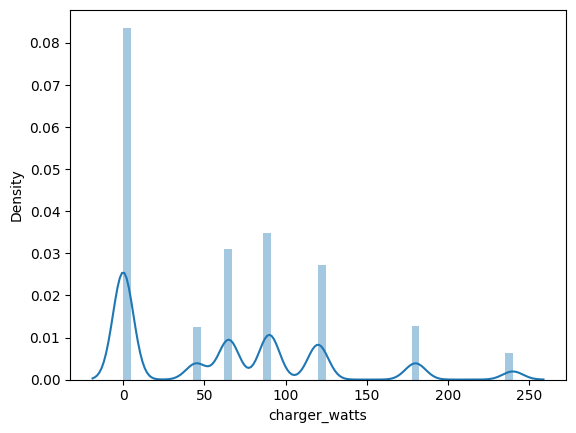

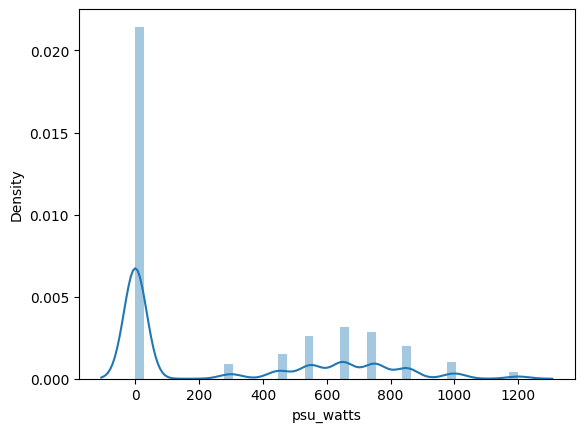

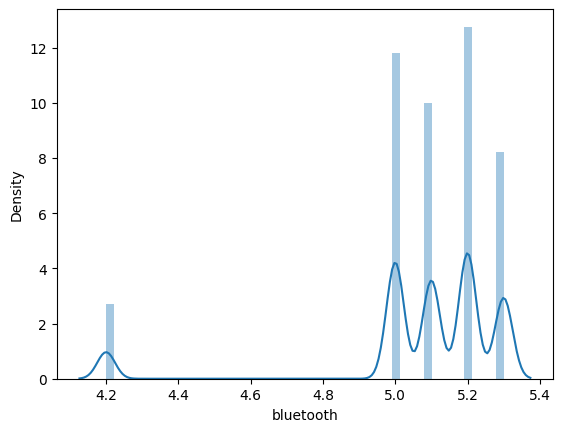

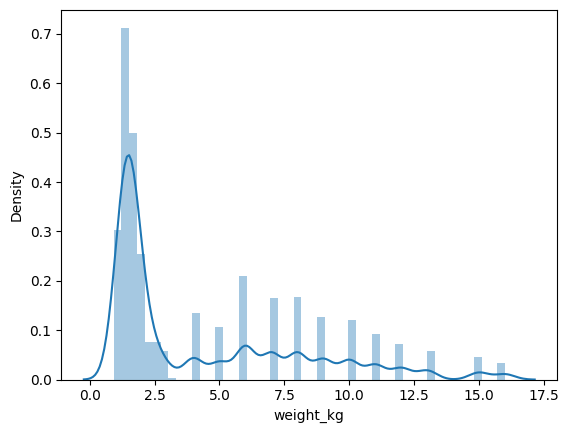

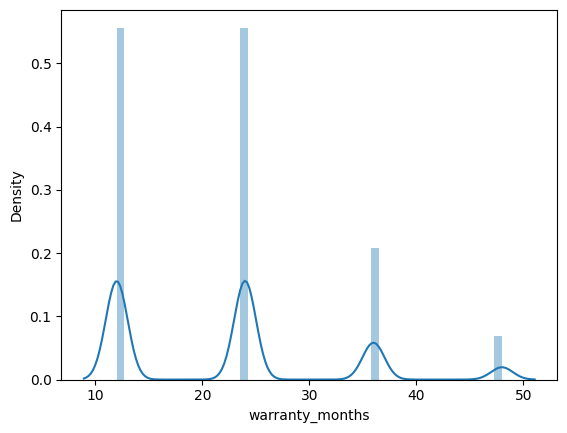

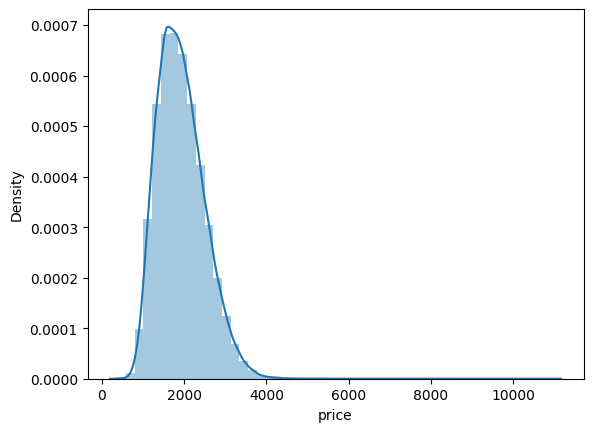

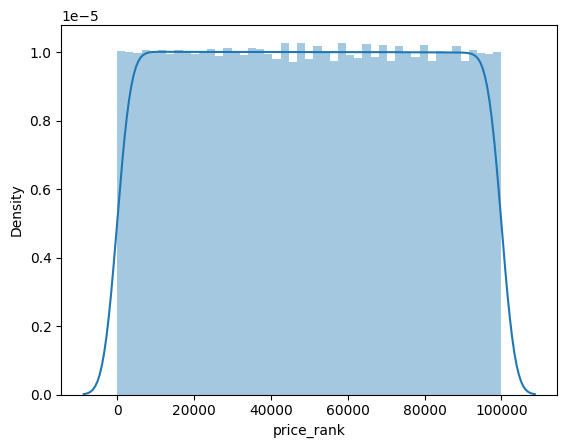

In [25]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    displots(i)

In [27]:
df.groupby('device_type')['brand'].value_counts()

device_type  brand   
Desktop      Lenovo      6485
             HP          5752
             Dell        5634
             Apple       4785
             ASUS        4066
             Acer        3881
             MSI         3218
             Samsung     3118
             Gigabyte    2025
             Razer       1192
Laptop       Lenovo      9507
             Dell        8371
             HP          8362
             Apple       7130
             ASUS        6093
             Acer        6044
             Samsung     4948
             MSI         4673
             Gigabyte    2875
             Razer       1841
Name: count, dtype: int64

In [28]:
df.groupby('device_type')['model'].value_counts()

device_type  model           
Desktop      ASUS Arena 6JO      2
             ASUS Arena DPE      2
             ASUS Arena GLF      2
             ASUS Arena RS5      2
             ASUS Creator 40T    2
                                ..
Laptop       Samsung Zen ZMS     1
             Samsung Zen ZRN     1
             Samsung Zen ZUI     1
             Samsung Zen ZVH     1
             Samsung Zen ZX2     1
Name: count, Length: 99267, dtype: int64

In [29]:
df.groupby('device_type')['release_year'].value_counts()

device_type  release_year
Desktop      2023             7273
             2024             7131
             2022             6433
             2025             6347
             2021             4882
             2020             3283
             2019             2809
             2018             1998
Laptop       2024            10838
             2023            10747
             2022             9621
             2025             9488
             2021             7134
             2020             4703
             2019             4281
             2018             3032
Name: count, dtype: int64

In [30]:
df.groupby('device_type')['os'].value_counts()

device_type  os      
Desktop      Windows     28882
             macOS        7205
             Linux        2496
             ChromeOS     1573
Laptop       Windows     42935
             macOS       11002
             Linux        3613
             ChromeOS     2294
Name: count, dtype: int64

In [31]:
df.groupby('device_type')['form_factor'].value_counts()

device_type  form_factor
Desktop      ATX            15597
             Micro-ATX       8672
             Full-Tower      7110
             SFF             5585
             Mini-ITX        3192
Laptop       Mainstream     17819
             Gaming         16876
             Ultrabook      13236
             2-in-1          7049
             Workstation     4864
Name: count, dtype: int64

In [32]:
df.groupby('device_type')['cpu_brand'].value_counts()

device_type  cpu_brand
Desktop      Intel        21131
             AMD          14240
             Apple         4785
Laptop       Intel        31643
             AMD          21071
             Apple         7130
Name: count, dtype: int64

In [33]:
df.groupby('device_type')['cpu_model'].value_counts()

device_type  cpu_model     
Desktop      Apple M1          572
             Apple M2 Pro      545
             Apple M2 Max      542
             Apple M3          538
             Apple M1 Pro      537
                              ... 
Laptop       Intel i9-14971      1
             Intel i9-14978      1
             Intel i9-14984      1
             Intel i9-14989      1
             Intel i9-14997      1
Name: count, Length: 42061, dtype: int64